#  Breast Cancer
 **Veri seti, bir grup hasta için meme kanseri tümörlerinin çeşitli ölçümleri hakkında bilgi içerir.**

In [17]:
# Gerekli kütüphaneler import edildi.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sns.set()


> # Datayı okuma

In [18]:
data=pd.read_csv("/kaggle/input/breast-cancer/cancer.csv")
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [19]:
del data["id"]
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

> # Datayı analiz etme 
Tanı dışında hepsi sürekli değişkenlerden oluşmakta tanı sutünu ise  kaegorik veri içeriyor. Tanı sutünu içinde yer alan B (Benign): iyi huylu tümörleri temsil eder  , M (Malignant): ise kötü huylu tümörleri temsil eder

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [21]:
data.shape

(569, 31)

In [22]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [23]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [24]:
data.describe(include="object")

diagnosis
count        569
unique         2
top            B
freq         357

In [25]:
class_count = data['diagnosis'].value_counts()
class_B = data[data['diagnosis'] == 'B']
class_M = data[data['diagnosis'] == 'M']

print('Class B:', class_B.shape)
print('Class M:', class_M.shape)

Class B: (357, 31)
Class M: (212, 31)


> # Null değerleri kontrol etme

<Axes: >

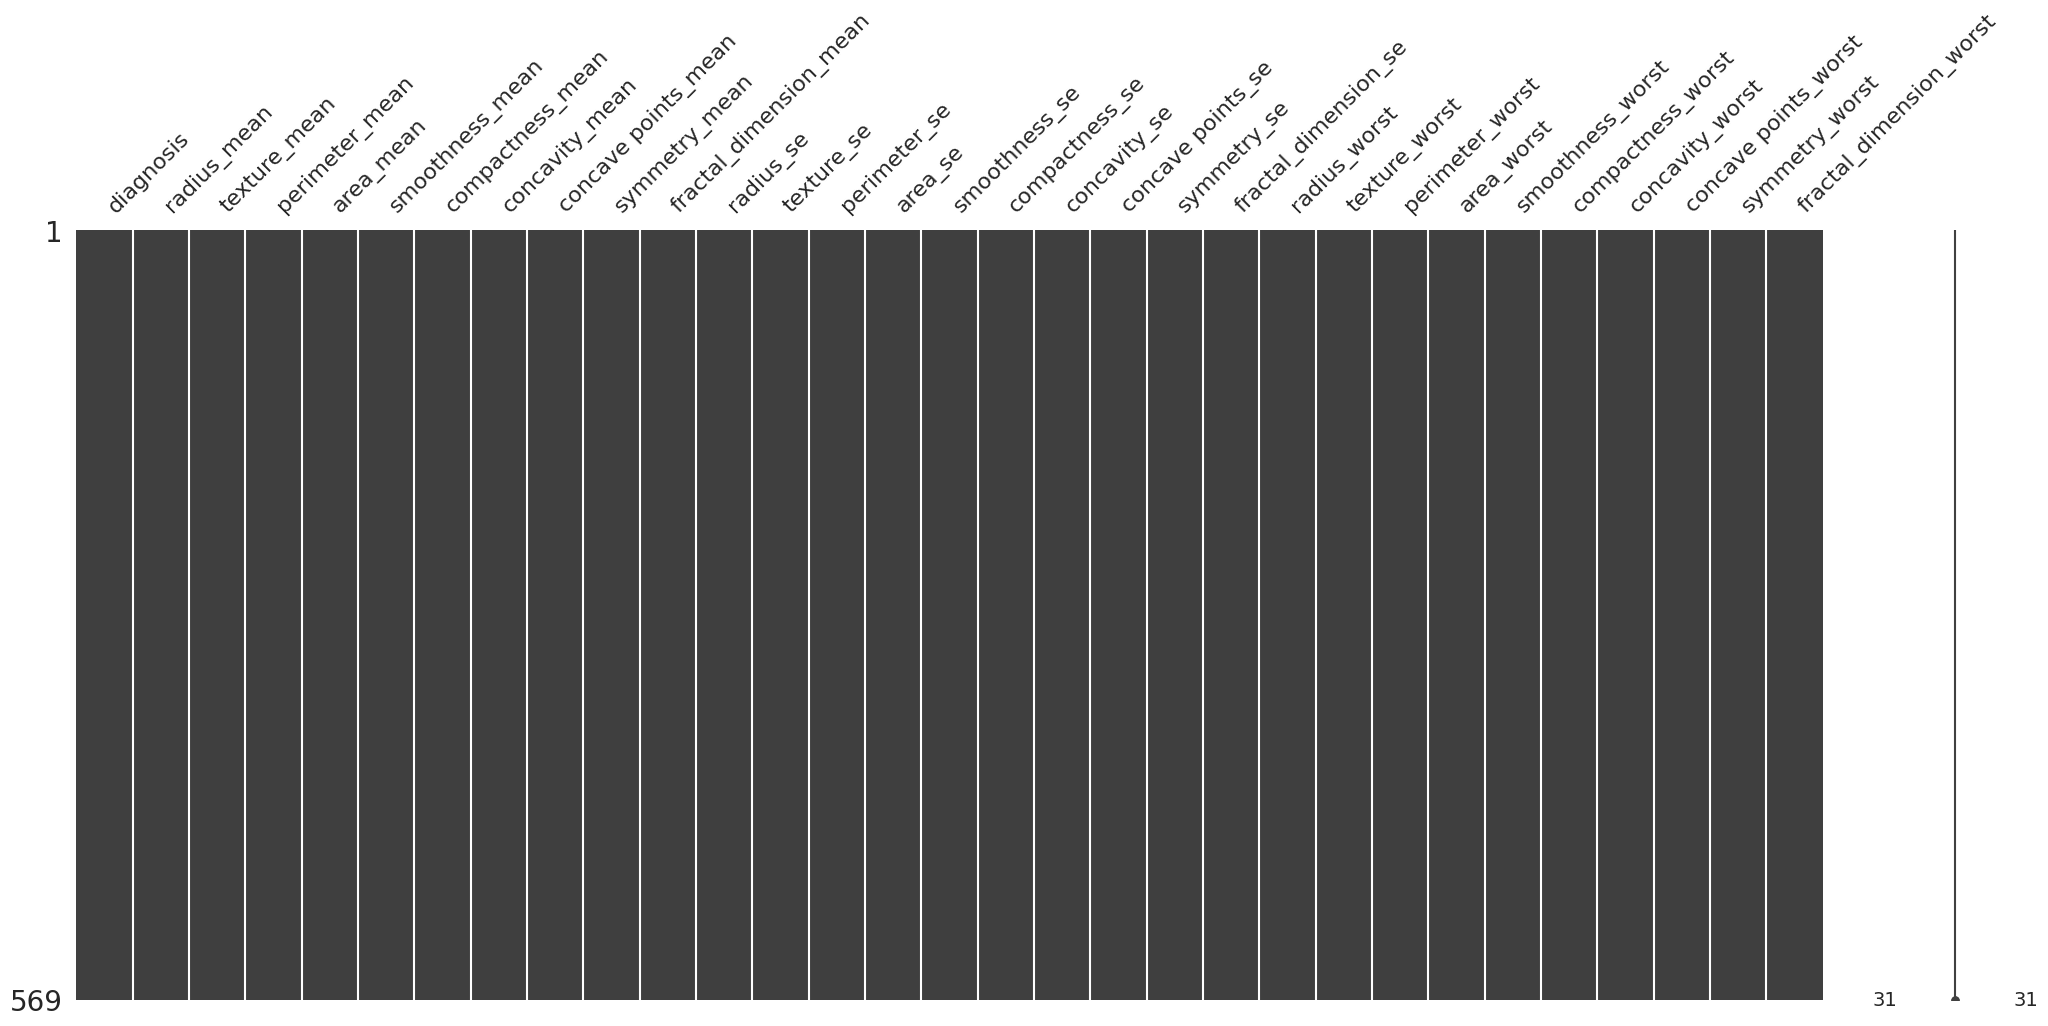

In [26]:
msno.matrix(data)

In [27]:
data.isnull()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        False        False         False           False      False   
1        False        False         False           False      False   
2        False        False         False           False      False   
3        False        False         False           False      False   
4        False        False         False           False      False   
..         ...          ...           ...             ...        ...   
564      False        False         False           False      False   
565      False        False         False           False      False   
566      False        False         False           False      False   
567      False        False         False           False      False   
568      False        False         False           False      False   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              False             False           False                False   
1              False             False           False                False   
2              False             False           False                False   
3              False             False           False                False   
4              False             False           False                False   
..               ...               ...             ...                  ...   
564            False             False           False                False   
565            False             False           False                False   
566            False             False           False                False   
567            False             False           False                False   
568            False             False           False                False   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0            False  ...         False          False            False   
1            False  ...         False          False            False   
2            False  ...         False          False            False   
3            False  ...         False          False            False   
4            False  ...         False          False            False   
..             ...  ...           ...            ...              ...   
564          False  ...         False          False            False   
565          False  ...         False          False            False   
566          False  ...         False          False            False   
567          False  ...         False          False            False   
568          False  ...         False          False            False   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         False             False              False            False   
1         False             False              False            False   
2         False             False              False            False   
3         False             False              False            False   
4         False             False              False            False   
..          ...               ...                ...              ...   
564       False             False              False            False   
565       False             False              False            False   
566       False             False              False            False   
567       False             False              False            False   
568       False             False              False            False   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   False           False                    False  
1                   False           False                    False  
2                   False           False                    False  
3                   False           False                    False  
4                   False           False                    False  
..                    .

> # Verilerin özelliklerini anlama

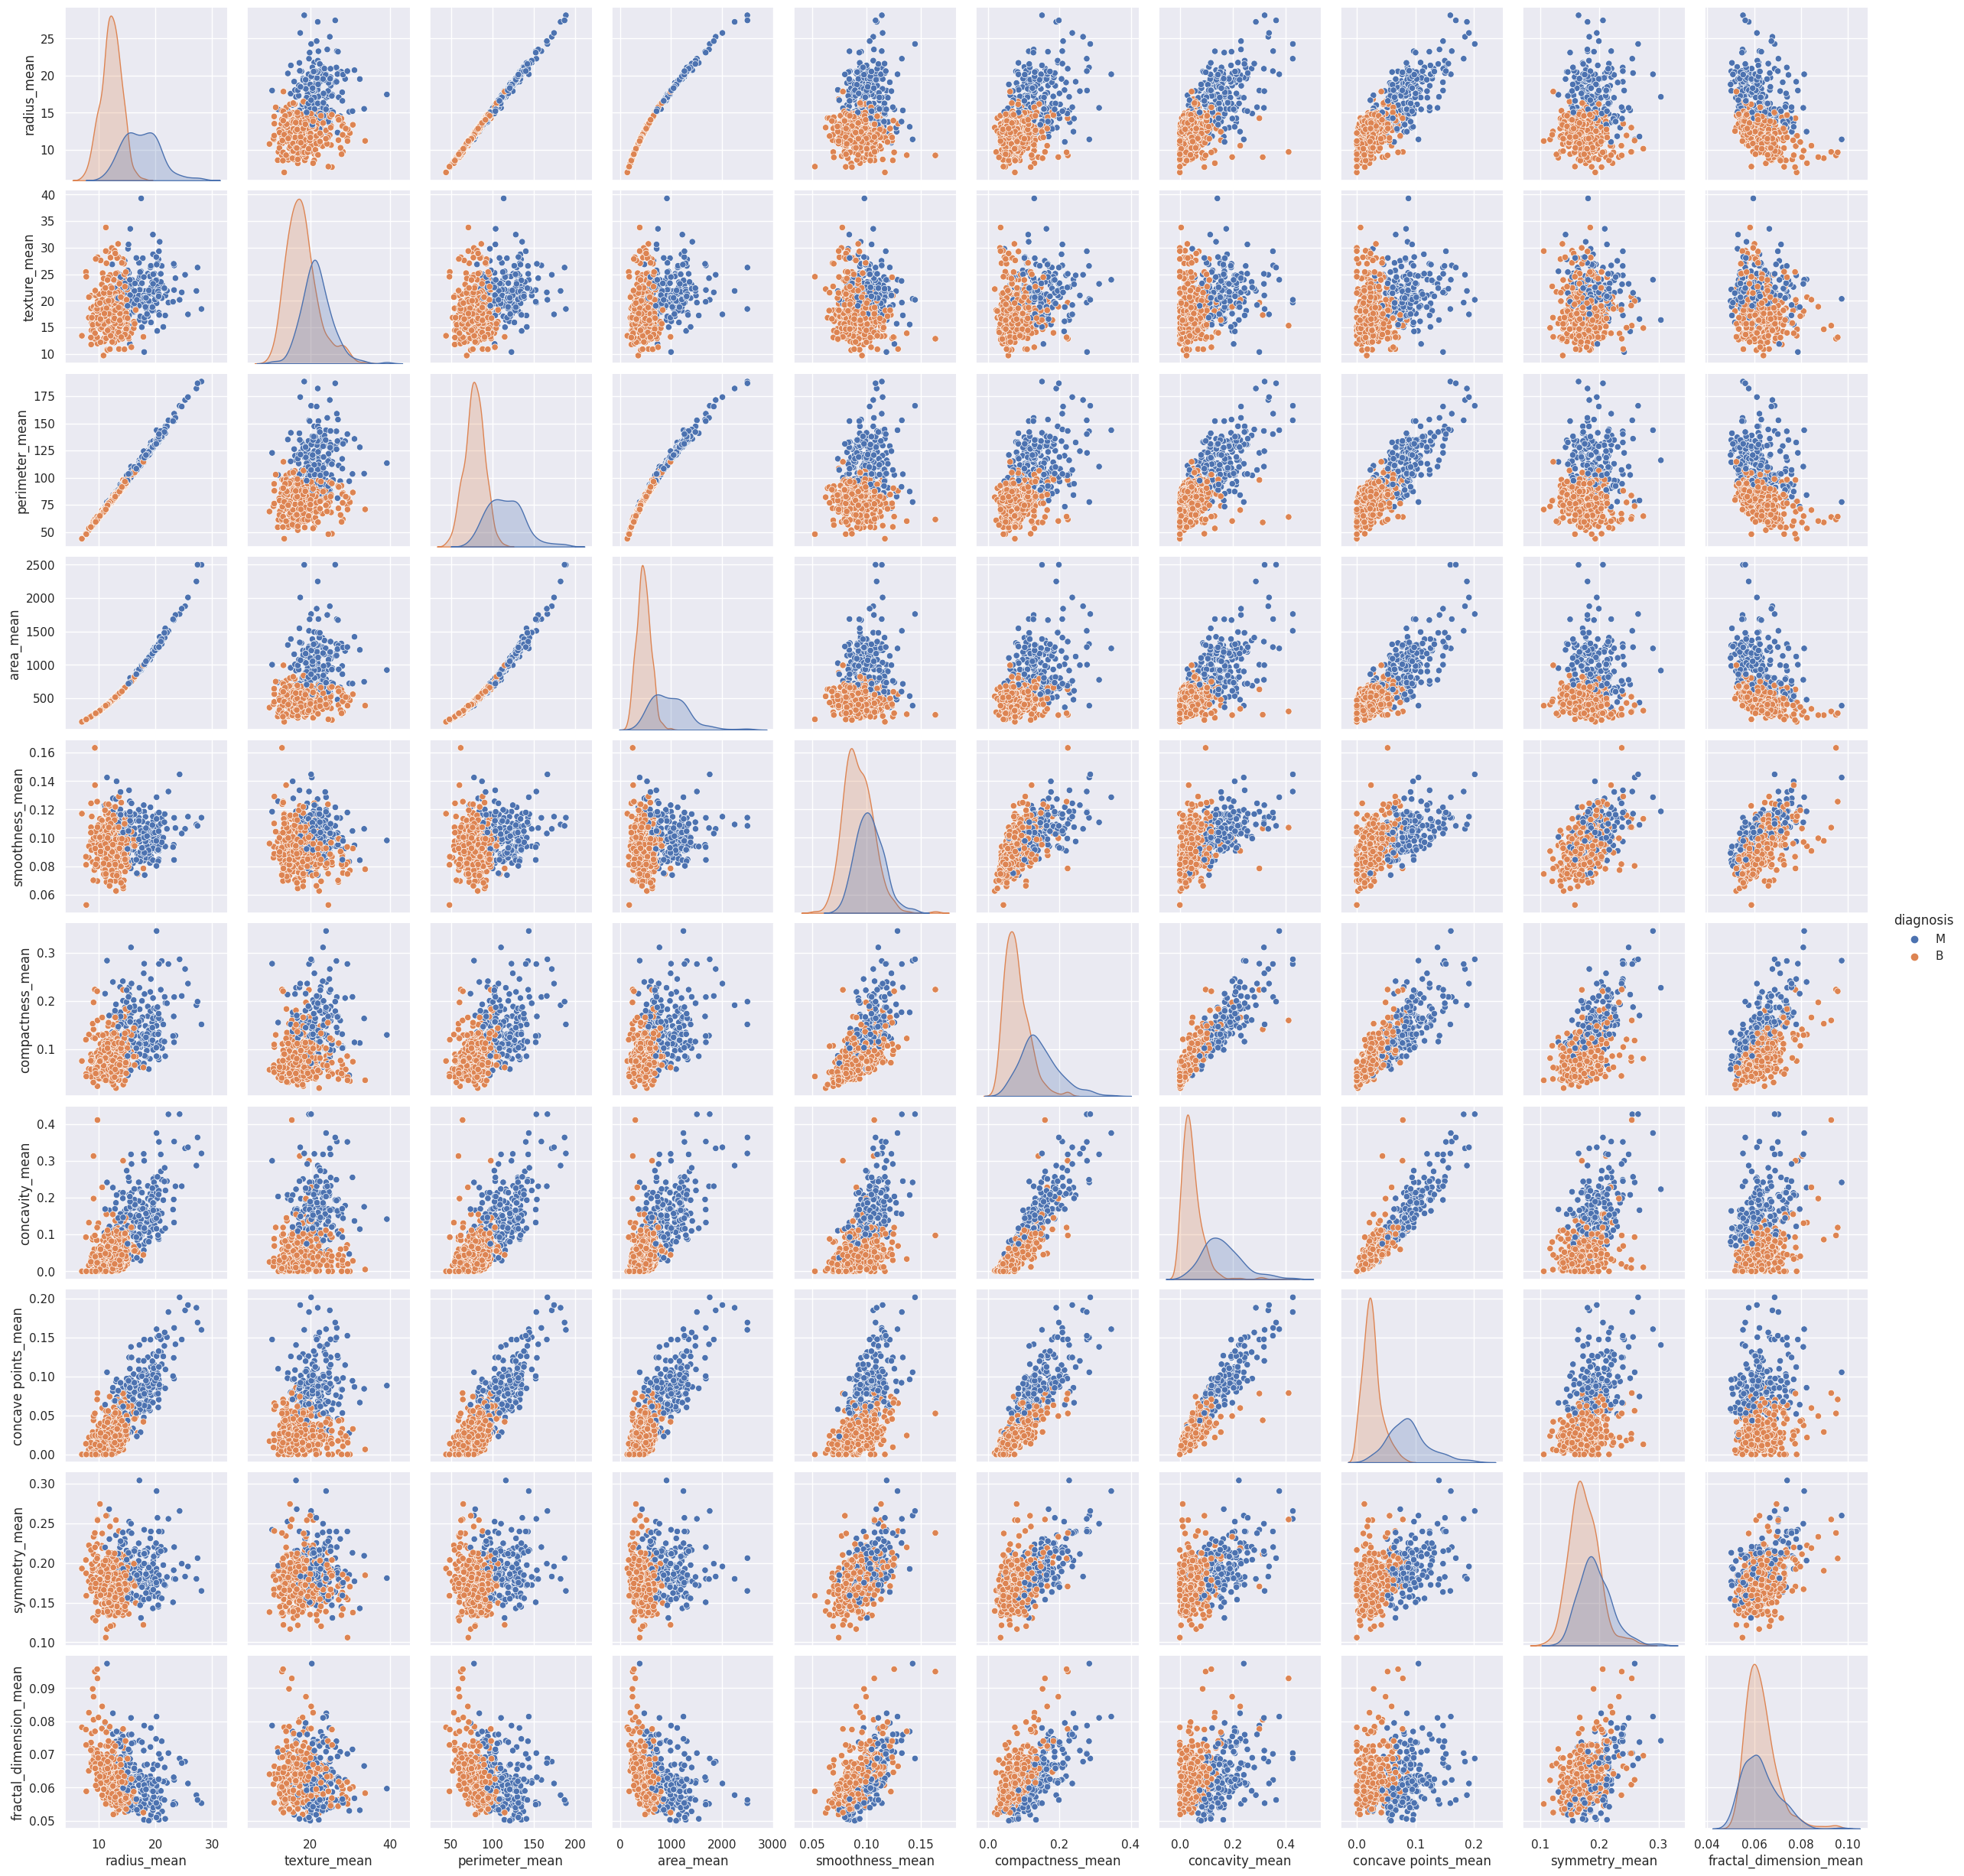

In [28]:
selected_features_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean' , 'smoothness_mean' ,'compactness_mean', 'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','diagnosis']
subset_data = data[selected_features_mean]

sns.pairplot(subset_data, hue='diagnosis')

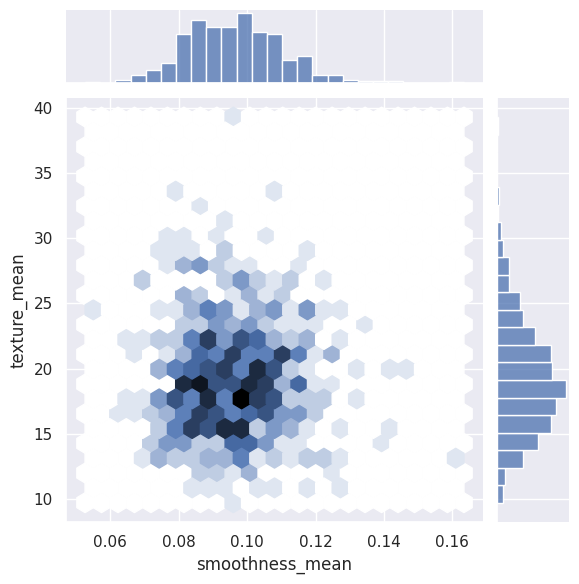

In [29]:
sns.jointplot(x = "smoothness_mean", y= "texture_mean", data=data, kind="hex")


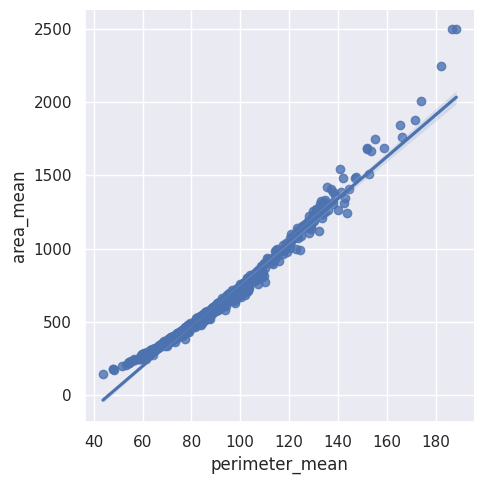

In [30]:
sns.lmplot(x = "perimeter_mean", y= "area_mean", data=data)

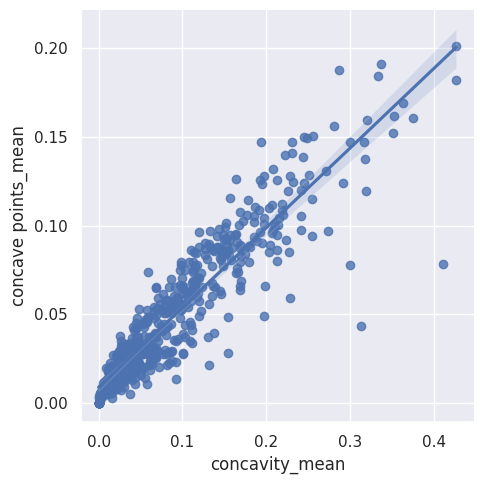

In [31]:
sns.lmplot(x = "concavity_mean", y= "concave points_mean", data=data)

In [32]:
#label encoder yöntemi ile kategorik veriyi etiketleme 0 iyi huylu 1 kötü huylu olarak 
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [33]:
data["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [34]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

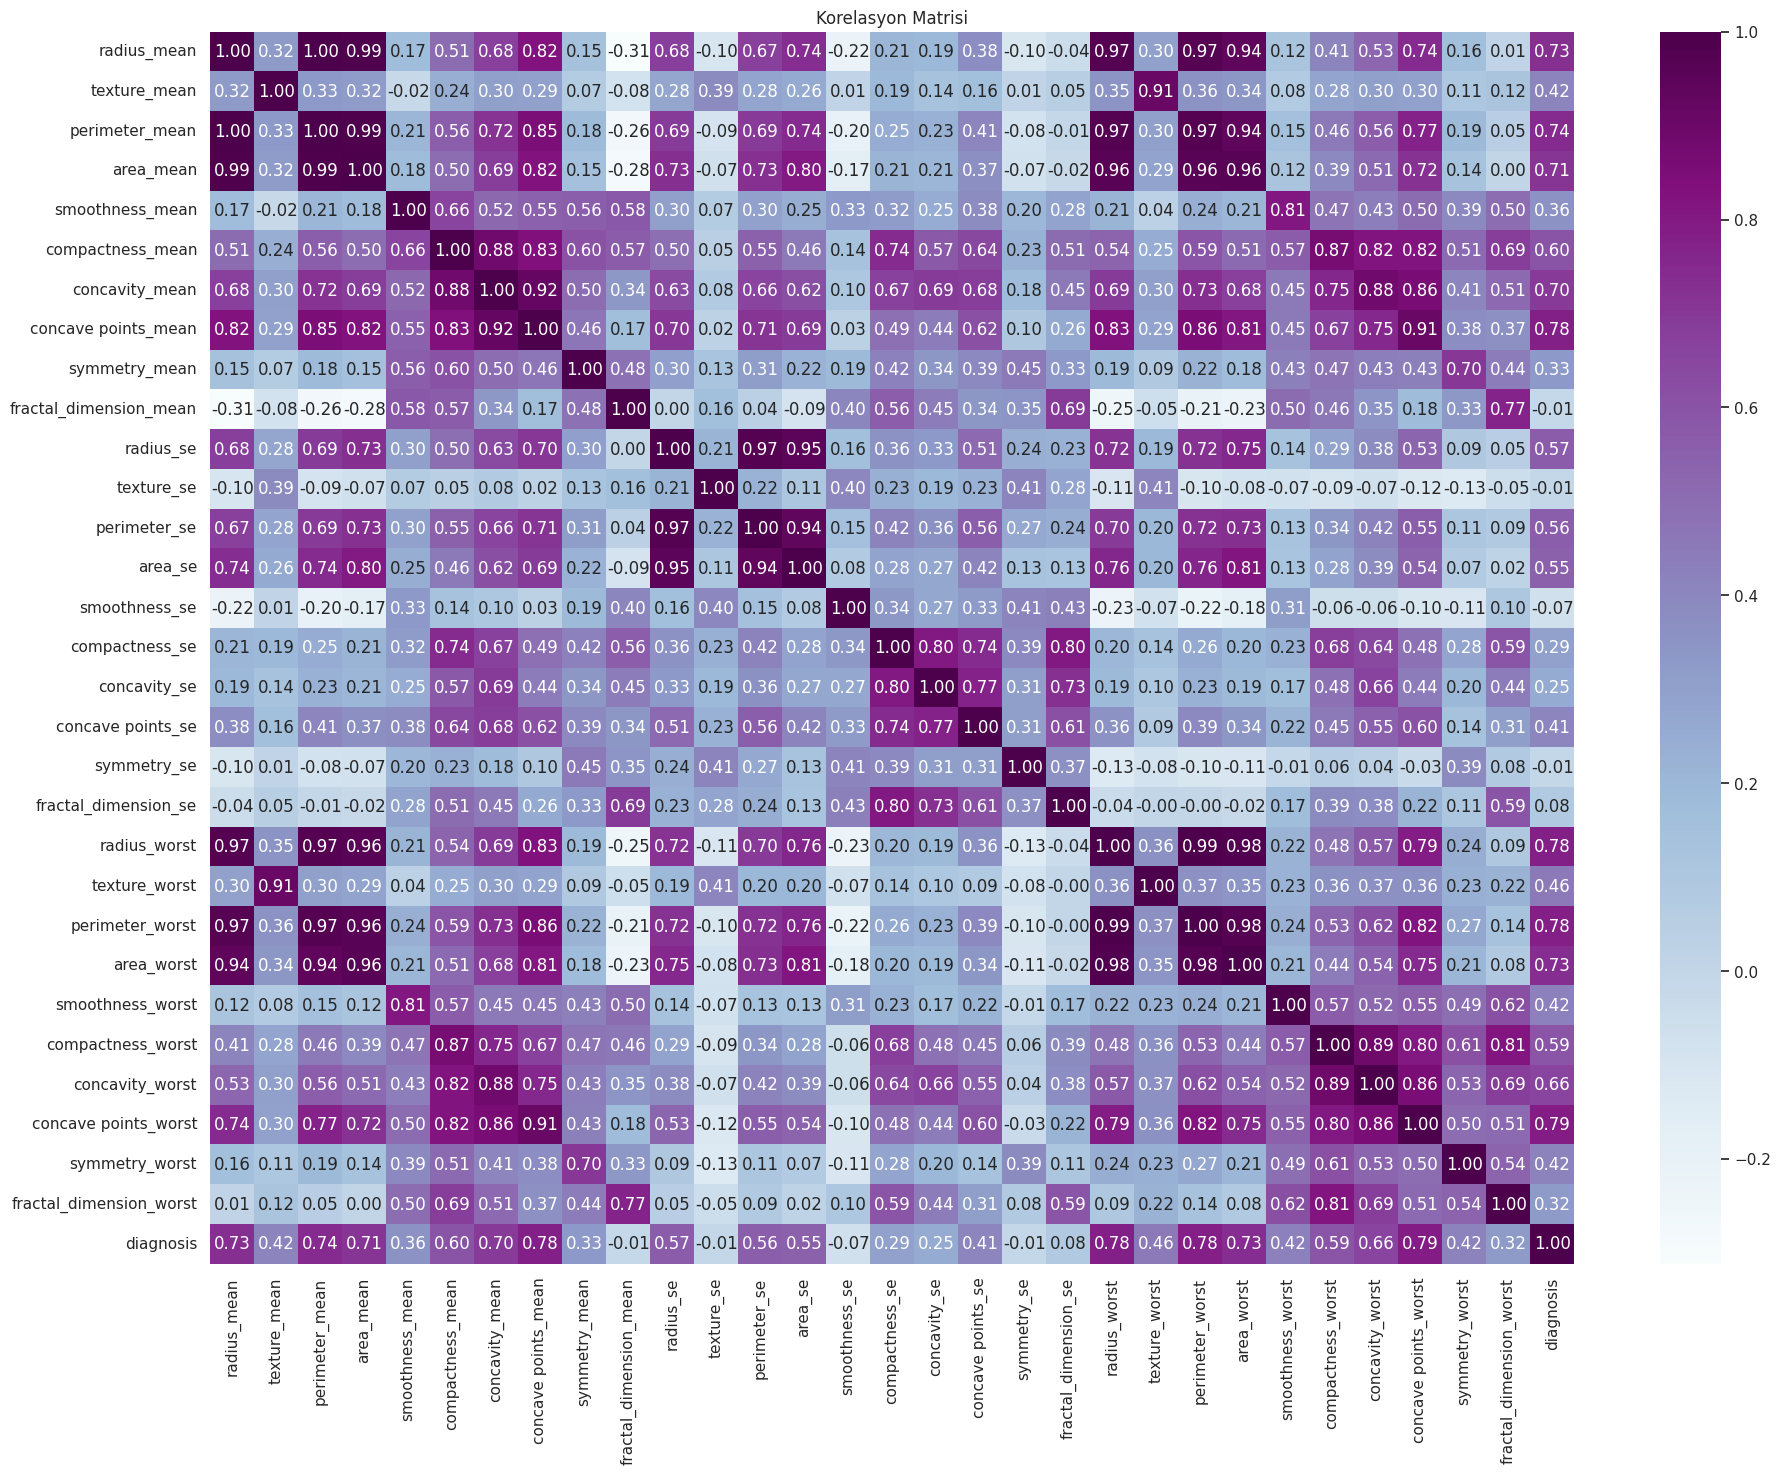

In [35]:
#korelasyon analizi yapma 
continuous_variables = data[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']]

correlation_matrix = continuous_variables.corr()
plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [36]:
data.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.


> * radius_mean, perimeter_mean ve area_mean arasında yüksek pozitif korelasyonlar var (0.99 ile 0.98 arasında). Bu beklenen bir durumdur, çünkü bu özellikler birbirleriyle doğru orantılıdır.

> * compactness_mean ve concavity_mean arasında da yüksek bir pozitif korelasyon vardır (0.88).


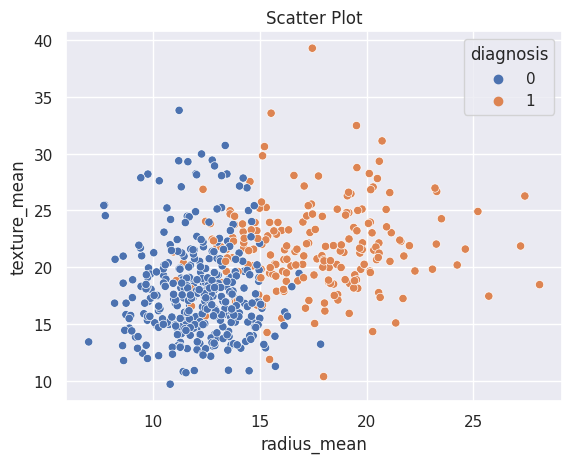

In [37]:
#tablodaki değerleri görselleştirme ve sonuç çıkarma
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot')
plt.show()

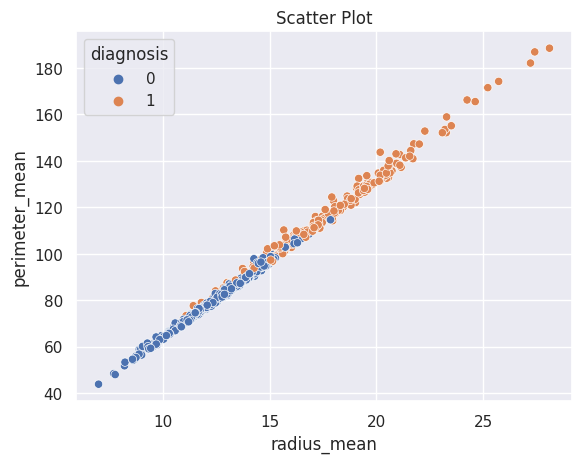

In [38]:
#tablodaki değerleri görselleştirme ve sonuç çıkarma
sns.scatterplot(x='radius_mean', y='perimeter_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot')
plt.show()

> * KDE (Kernel Density Estimation) veri setinin olasılık yoğunluğunu göstermek için görselleştirme sağlar

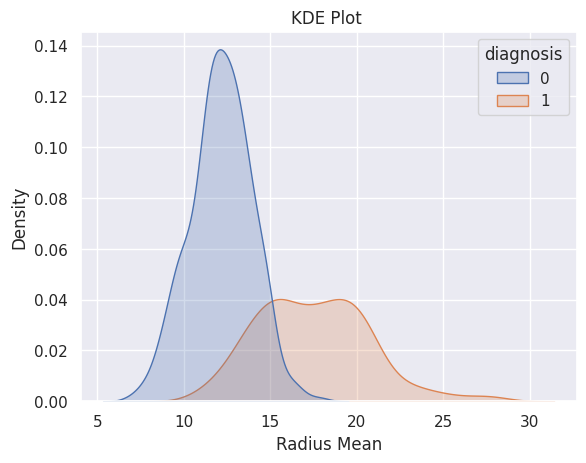

In [39]:
#bimodal dağılım
sns.kdeplot(data=data ,x='radius_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Radius Mean')
plt.ylabel('Density')
plt.title('KDE Plot ')
plt.show()

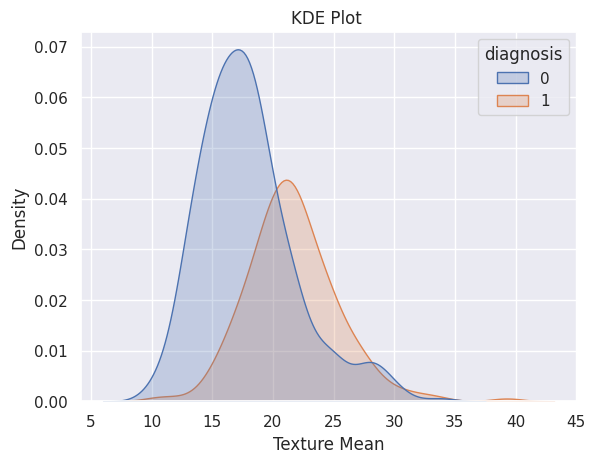

In [40]:
sns.kdeplot(data=data , x='texture_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Texture Mean')
plt.ylabel('Density')
plt.title('KDE Plot ')
plt.show()

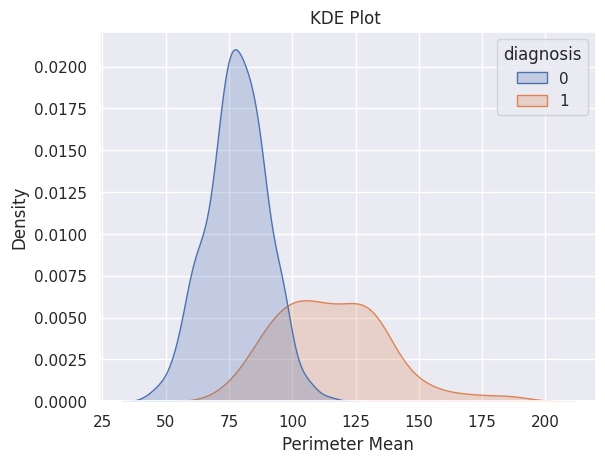

In [41]:
sns.kdeplot(data=data, x='perimeter_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Perimeter Mean')
plt.ylabel('Density')
plt.title('KDE Plot ')
plt.show()

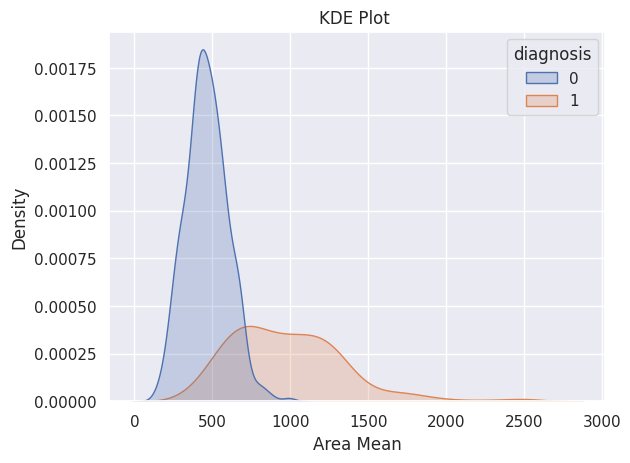

In [42]:
sns.kdeplot(data=data ,x='area_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Area Mean')
plt.ylabel('Density')
plt.title('KDE Plot ')
plt.show()

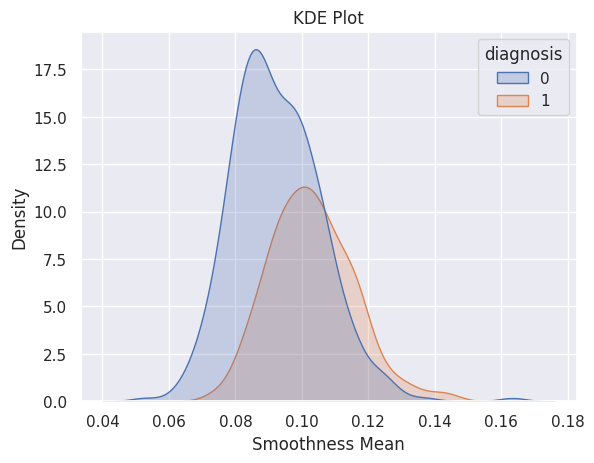

In [43]:
sns.kdeplot(data=data, x='smoothness_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Smoothness Mean')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

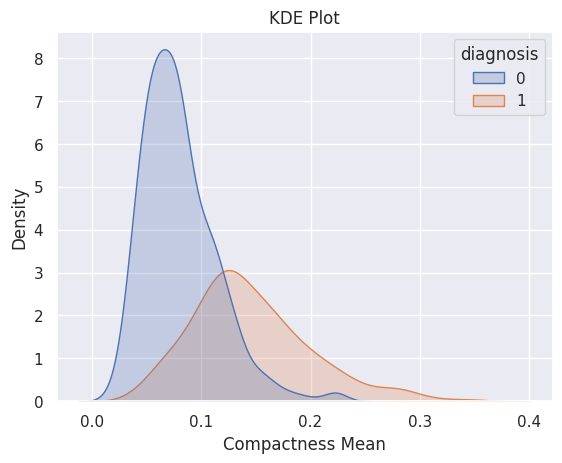

In [44]:
sns.kdeplot(data=data, x='compactness_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Compactness Mean')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

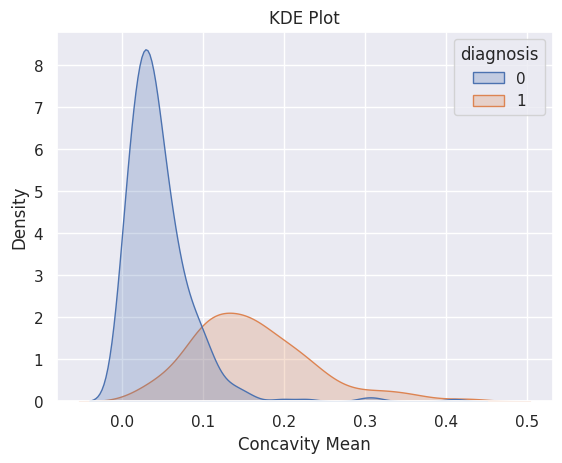

In [45]:
sns.kdeplot(data=data, x='concavity_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Concavity Mean')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

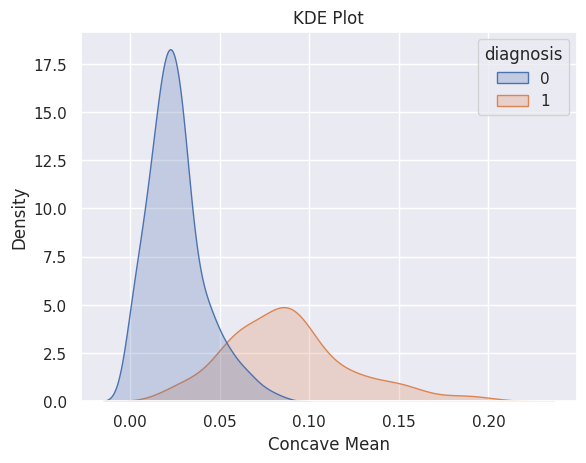

In [46]:
sns.kdeplot(data=data, x='concave points_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Concave Mean')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

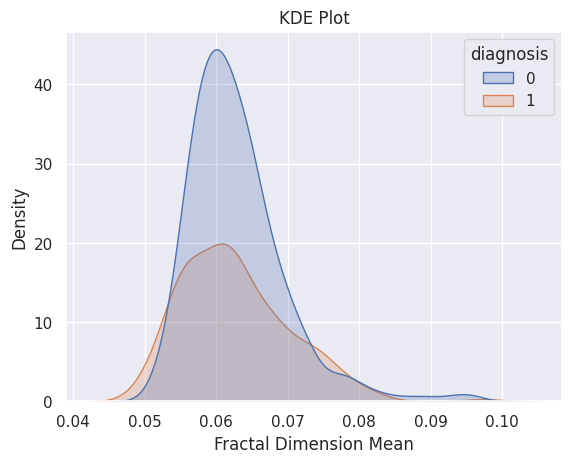

In [47]:
sns.kdeplot(data=data, x='fractal_dimension_mean', fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Fractal Dimension Mean')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

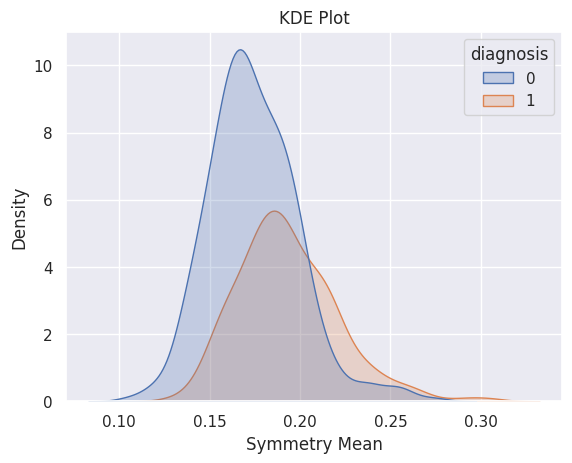

In [48]:
sns.kdeplot(data=data, x='symmetry_mean',fill=True, hue='diagnosis', color="#8b0a50")
plt.xlabel('Symmetry Mean')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

> # Outlier tespiti için boxplotlardan yararlanarak görselleştirme

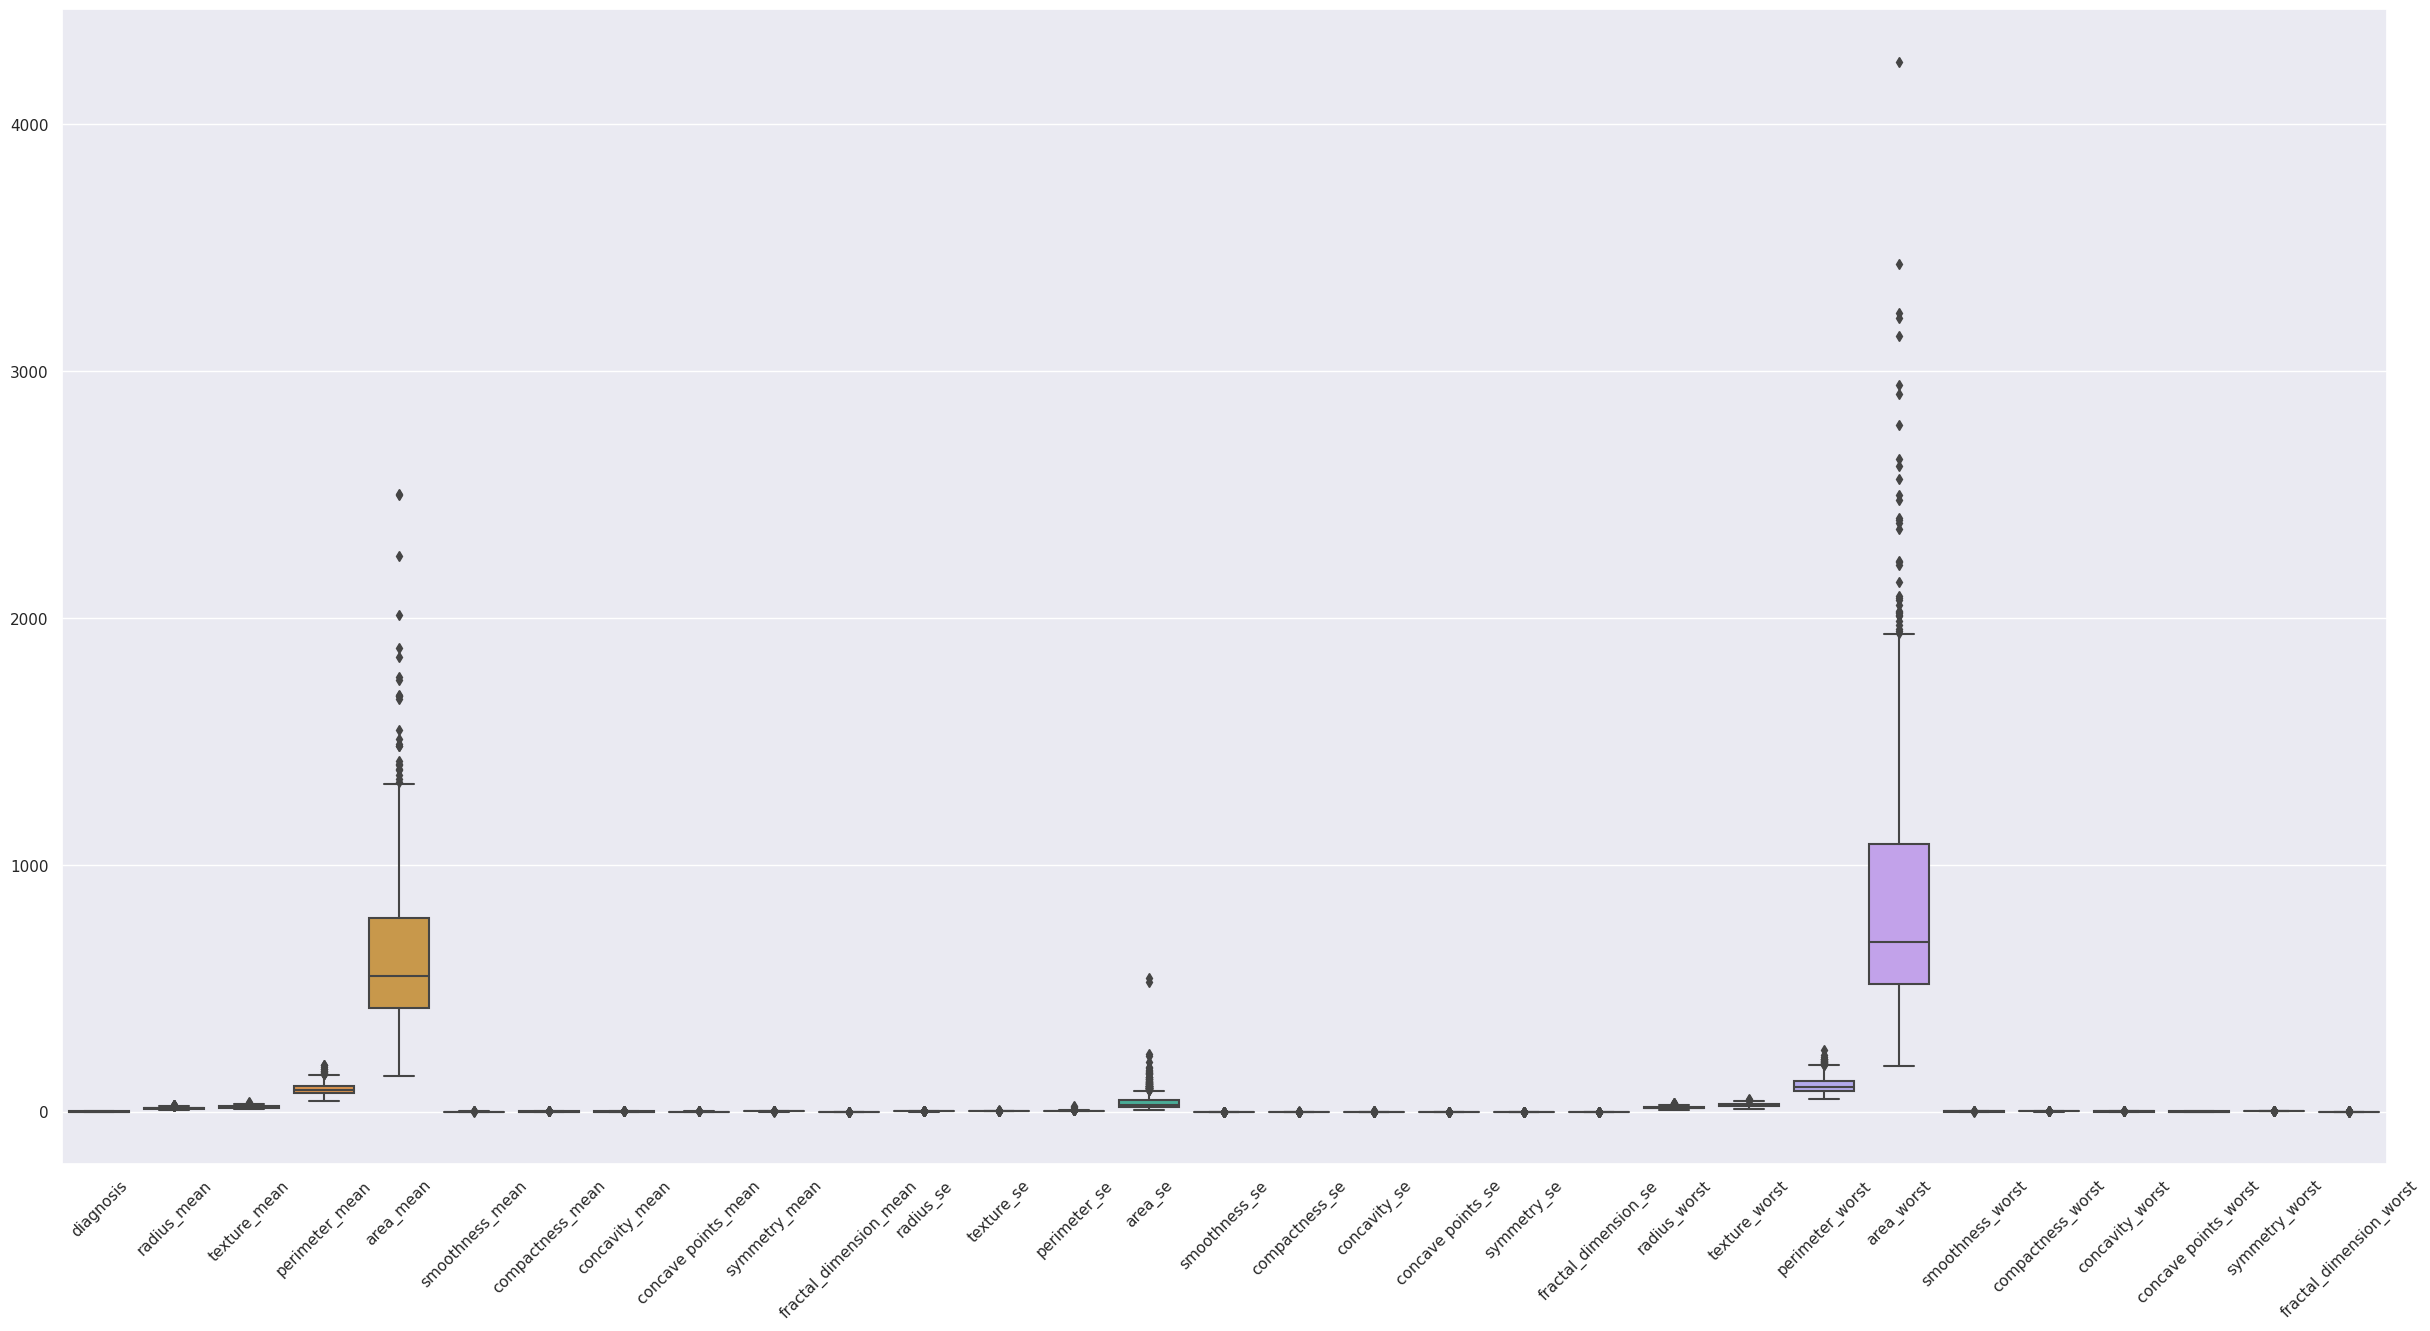

In [49]:
plt.figure(figsize=(30,15))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [51]:
#outlier için ıqr methodunu kullanarak outlier değerleri yok etme 
for column in data.select_dtypes(include='float64').columns:
    q3 = np.quantile(data[column], 0.75)
    q1 = np.quantile(data[column], 0.25)
    iqr = q3 - q1
    lowerbound = q1 - (1.5 * iqr)
    upperbound = q3 + (1.5 * iqr)
    data[column] = np.where(data[column] > upperbound, upperbound, data[column])
    data[column] = np.where(data[column] < lowerbound, lowerbound, data[column])


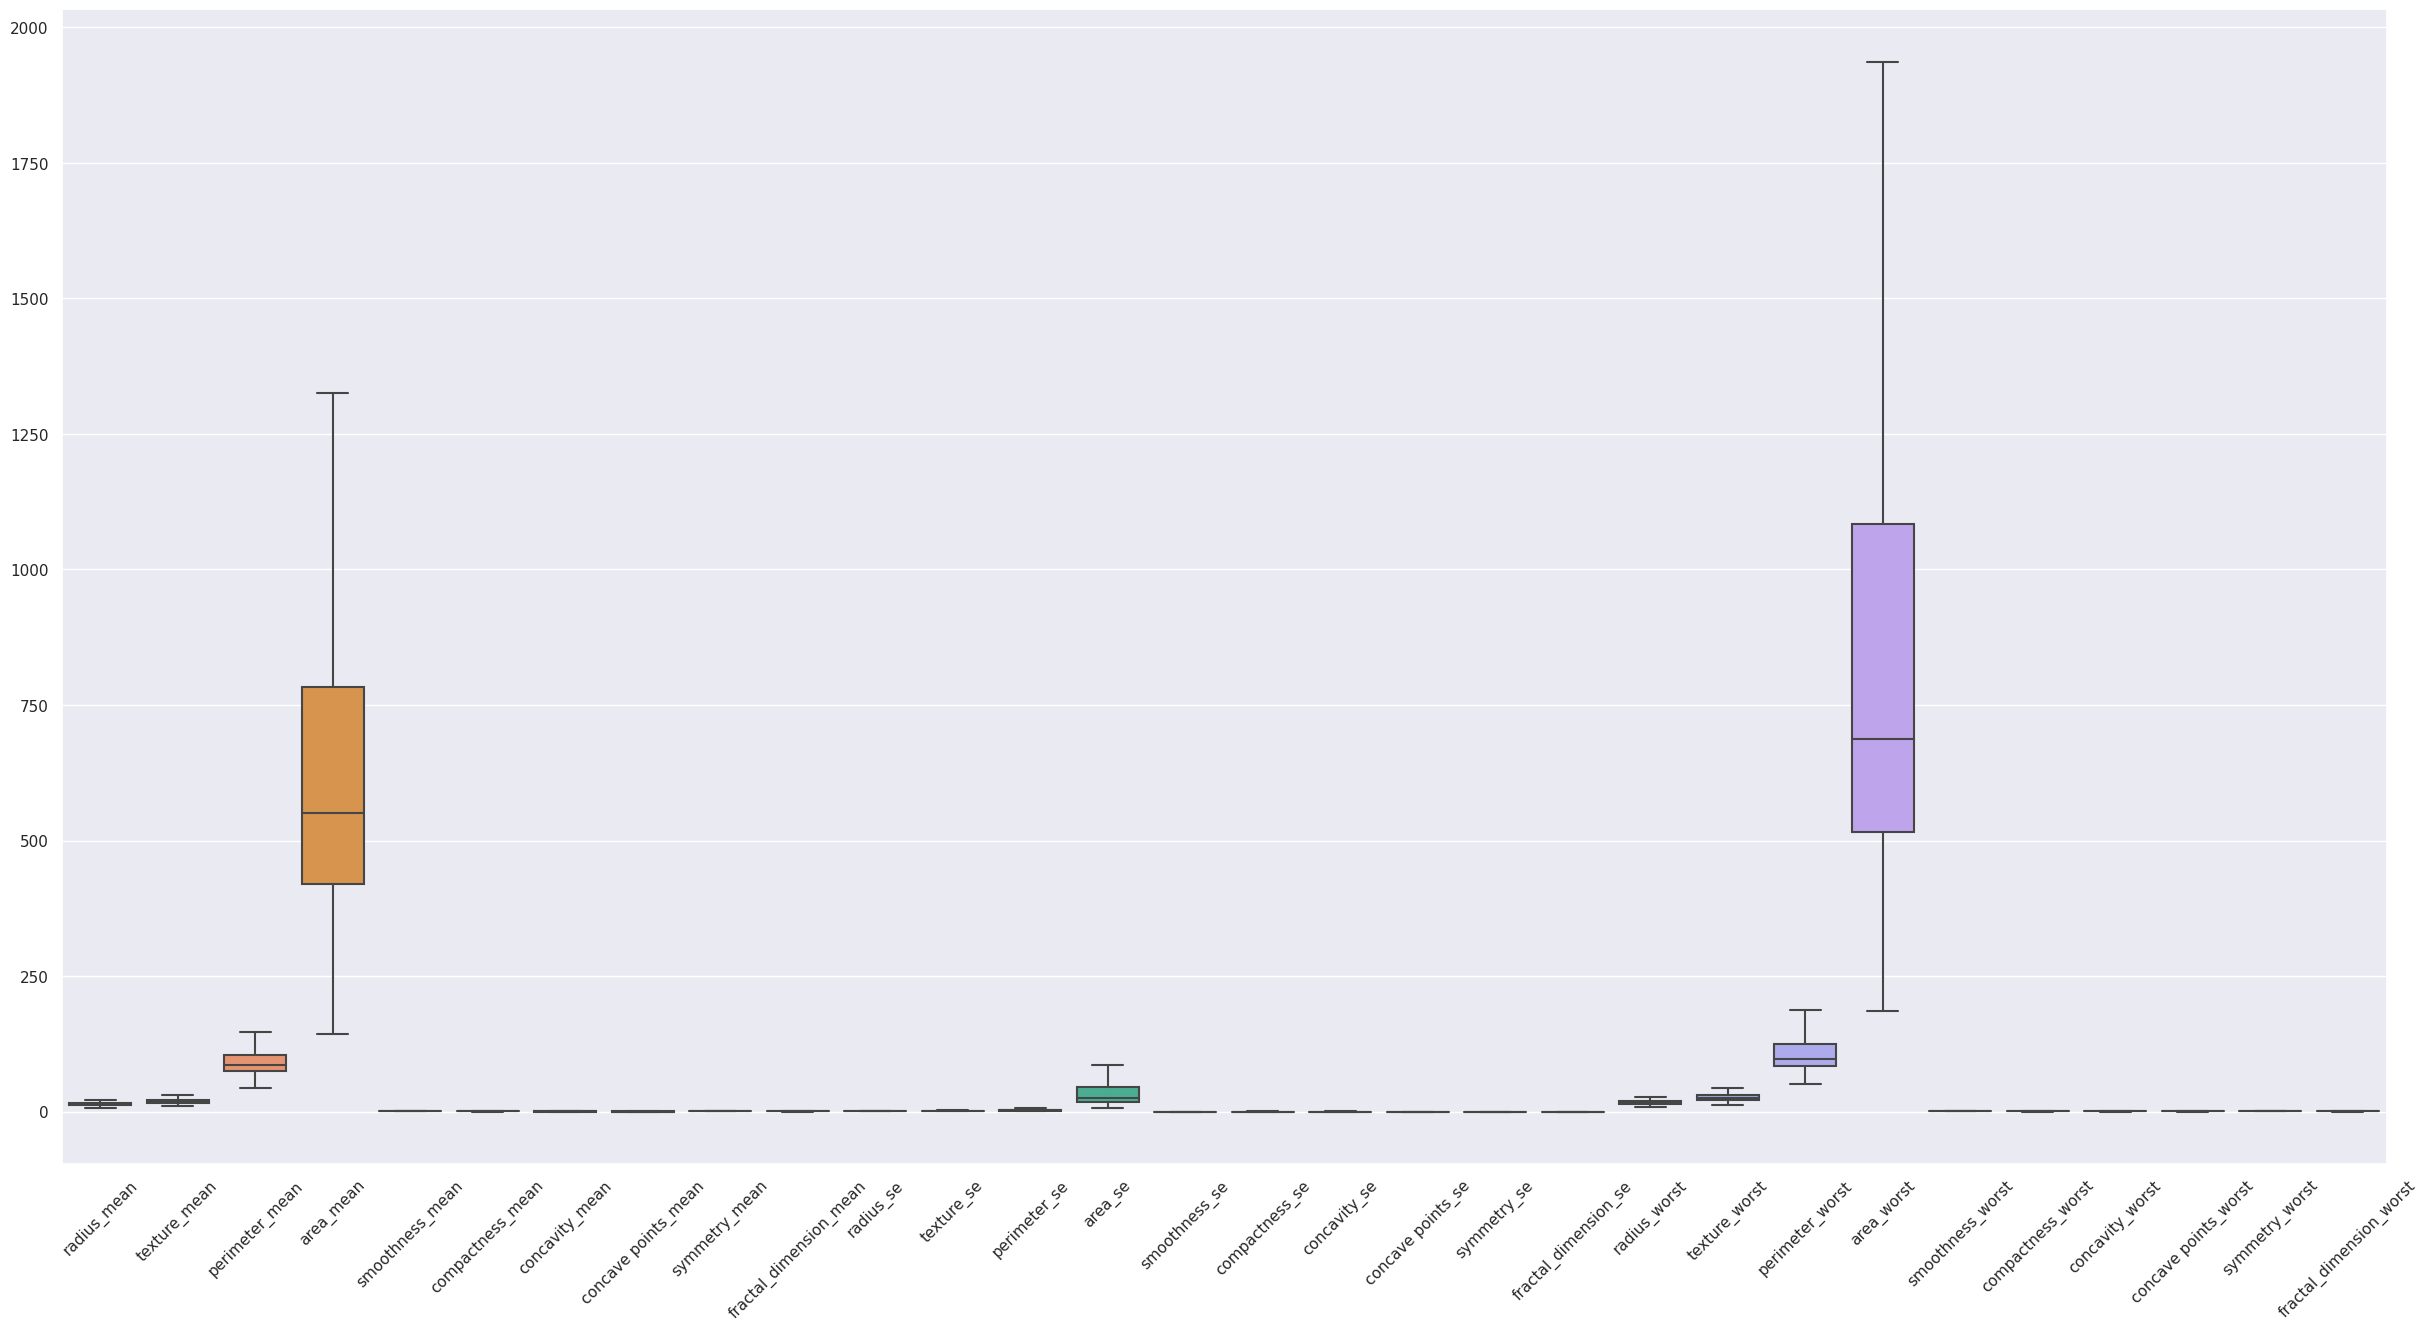

In [52]:
#outlierları yok olan sutunları görselleştirme
plt.figure(figsize=(30, 15))
sns.boxplot(data=data.select_dtypes(include='float64'))
plt.xticks(rotation=45)
plt.show()

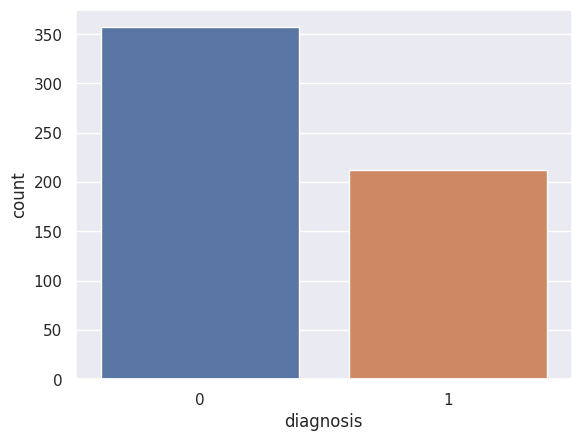

In [53]:
#veri dengede değil bunun için over-under sampling methodlarını kullanacaktım ama modelin overfit olması gibi bir durum söz konusu olduğundan SMOTE yöntemini seçtim.
sns.countplot(x='diagnosis', data=data)
plt.show()

> # ML uygulamaları train test set bölme

In [54]:
X = data.drop("diagnosis" , axis=1)
y = data["diagnosis"]

In [55]:
#Target değeer 0-1 olarak label aldı aslında B - M.
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [56]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0         0.118400   
1          20.57         17.77          132.90     1326.0         0.084740   
2          19.69         21.25          130.00     1203.0         0.109600   
3          11.42         20.38           77.58      386.1         0.133695   
4          20.29         14.34          135.10     1297.0         0.100300   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1326.3         0.111000   
565        20.13         28.25          131.20     1261.0         0.097800   
566        16.60         28.08          108.30      858.1         0.084550   
567        20.60         29.33          140.10     1265.0         0.117800   
568         7.76         24.54           47.92      181.0         0.057975   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.22862         0.28241              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.22862         0.24140              0.10520         0.2464   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.22862         0.28241              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.07875  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60     1937.05           0.16220            0.62695   
1             158.80     1937.05           0.12380            0.18660   
2             152.50     1709.00           0.14440            0.42450   
3              98.87      567.70           0.19010            0.62695   
4             152.20     1575.00           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10     1937.05           0.14100            0.21130   
565           155.00     1731.00           0.11660            0.19220   
566           126.70     1124.00           0.11390            0.30940   
567           184.60     1821.00           0.16500            0.62695   
568            59.16      268.60           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654         0.41915   
1             0.2416                0.1860         0.27500   
2             0.4504                0.2430         0.36130   
3             0.6869                0.2575         0.41915   
4             0.4000                0.1625         0.23640   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [57]:
#train-test sete ayırma işlemi
#x bağımsız değişkenler y bağımlı değişkenin bulunduğu veri seti
# X -> features
# y -> target

# X_train -> train sırasında kullanılan veriler (featuers)
# y_train -> train sırasında kullanılan target

# X_test -> test edilirken kullanılan featurelar
# y_test -> test edilirken tahmin edilecek olan target. 
#traine düşeni fazla tutup modelin iyi öğrenmesini sağlıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
68            0.14130         0.28241              0.04375         0.2111   
181           0.22862         0.24870              0.14960         0.2395   
63            0.08751         0.05988              0.02180         0.2341   
248           0.07234         0.02379              0.01615         0.1897   
60            0.08061         0.01084              0.01290         0.2464   
..                ...             ...                  ...            ...   
71            0.15310         0.08606              0.02872         0.1902   
106           0.10170         0.07070              0.03485         0.1801   
270           0.02675         0.00725              0.00625         0.1508   
435           0.11330         0.11260              0.06463         0.1669   
102           0.04038         0.02383              0.01770         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
68                  0.07875  ...        10.310          22.65   
181                 0.07398  ...        26.680          33.48   
63                  0.06963  ...        10.010          19.23   
248                 0.06329  ...        12.250          35.19   
60                  0.06960  ...        11.020          17.45   
..                      ...  ...           ...            ...   
71                  0.07875  ...         9.733          15.67   
106                 0.06520  ...        13.140          29.26   
270                 0.05376  ...        14.910          20.65   
435                 0.06544  ...        17.040          30.80   
102                 0.05677  ...        13.340          32.84   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
68             65.50      324.70           0.14820            0.43650   
181           176.50     1937.05           0.14910            0.62695   
63             65.59      310.10           0.09836            0.16780   
248            77.98      455.70           0.14990            0.13980   
60             69.86      368.60           0.12750            0.09866   
..               ...         ...               ...                ...   
71             62.56      284.40           0.12070            0.24360   
106            85.51      521.70           0.16880            0.26600   
270            94.44      684.60           0.08567            0.05036   
435           113.90      869.30           0.16130            0.35680   
102            84.58      547.80           0.11230            0.08862   

     concavity_worst  concave points_worst  symmetry_worst  \
68           0.78550               0.17500         0.41915   
181          0.67800               0.29030         0.40980   
63           0.13970               0.05087         0.32820   
248          0.11250               0.06136         0.34090   
60           0.02168               0.02579         0.35570   
..               ...                   ...             ...   
71           0.14340               0.04786         

In [59]:
X_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47        18.600           81.09      481.9          0.09965   
70         18.94        21.310          123.60     1130.0          0.09009   
131        15.46        19.480          101.70      748.9          0.10920   
431        12.40        17.680           81.47      467.8          0.10540   
540        11.54        14.440           74.65      402.9          0.09984   
..           ...           ...             ...        ...              ...   
486        14.64        16.850           94.21      666.0          0.08641   
75         16.07        19.650          104.10      817.7          0.09168   
249        11.52        14.930           73.87      406.3          0.10130   
238        14.22        27.850           92.55      623.9          0.08223   
265        20.73        30.245          135.70     1326.3          0.09469   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
204           0.10580         0.08005              0.03821         0.1925   
70            0.10290         0.10800              0.07951         0.1582   
131           0.12230         0.14660              0.08087         0.1931   
431           0.13160         0.07741              0.02799         0.1811   
540           0.11200         0.06737              0.02594         0.1818   
..                ...             ...                  ...            ...   
486           0.06698         0.05192              0.02791         0.1409   
75            0.08424         0.09769              0.06638         0.1798   
249           0.07808         0.04328              0.02929         0.1883   
238           0.10390         0.11030              0.04408         0.1342   
265           0.11430         0.13670              0.08646         0.1769   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
204                 0.06373  ...         14.97          24.64   
70                  0.05461  ...         24.86          26.58   
131                 0.05796  ...         19.26          26.00   
431                 0.07102  ...         12.88          22.91   
540                 0.06782  ...         12.26          19.68   
..                      ...  ...           ...            ...   
486                 0.05355  ...         16.46          25.44   
75                  0.05391  ...         19.77          24.56   
249                 0.06168  ...         12.65          21.19   
238                 0.06129  ...         15.75          40.54   
265                 0.05674  ...         27.46          42.68   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
204           96.050      677.90            0.1426             0.2378   
70           165.900     1866.00            0.1193             0.2336   
131          124.900     1156.00            0.1546             0.2394   
431           89.610      515.80            0.1450             0.2629   
540           78.780      457.80            0.1345             0.2118   
..               ...         ...               ...                ...   
486          106.000      831.00            0.1142             0.2070   
75           128.800     1223.00            0.1500             0.2045   
249           80.880      491.80            0.1389             0.1582   
238          102.500      764.00            0.1081             0.2426   
265          187.335     1937.05            0.1401             0.2644   

     concavity_worst  concave points_worst  symmetry_worst  \
204           0.2671               0.10150          0.3014   
70            0.2687               0.17890          0.2551   
131           0.3791               0.15140          0.2837   
431           0.2403               0.07370          0.2556   
540           0.1797               0.06918          0.2329   
..               ...                   ...             ...   
486           0.2437               0.07828         

In [60]:
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

In [61]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

> # Dengede olmayan tanılarla ML modeli

In [62]:
#smote yapmadan deneyelim
from sklearn.linear_model import LogisticRegression

log= LogisticRegression(max_iter=10000, random_state=42)



In [63]:
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

In [64]:
#diagnosis gerçek sınıf etiketlerini içeriyor y_testten alınan , y_pred ise modelin yaptığı tahminleri.
results= pd.DataFrame()
results["Diagnosis"] = y_test
results["Predictions"] = y_pred

results

Diagnosis  Predictions
204          0            0
70           1            1
131          1            1
431          0            0
540          0            0
..         ...          ...
486          0            0
75           1            1
249          0            0
238          0            1
265          1            1

[114 rows x 2 columns]

In [65]:
from sklearn.metrics import accuracy_score
test_data_accuracy =accuracy_score(y_pred, y_test) 
print("Test set accuracy: ", test_data_accuracy)

Test set accuracy:  0.956140350877193


> # Dengede olan tanılar(smote) ve  ML modeli

In [66]:
#diagnosis değerlerim dengede olmadığı için setetik azınlık aşırı örnekleme yöntemini kullanmak zorunda kaldım.
#train setinde bu işlem uygulandı çünkü model gerçek dünyaya bağlı kalsın değişmesin diye
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

diagnosis
0    286
1    286
Name: count, dtype: int64


In [67]:
#Lojistik regresyon sınıflandırma problemleri için kullandığından bu modeli seçtim.
from sklearn.linear_model import LogisticRegression

In [68]:
#model oluşturmak
log= LogisticRegression(max_iter=10000, random_state=42)

In [69]:
#modeli eğitmek
log.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=10000, random_state=42)

In [70]:
#train seti üzerinden predict alma
x_pred = log.predict(X_resampled)

In [71]:
x_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [72]:
from sklearn.metrics import accuracy_score
train_data_accuracy =accuracy_score(x_pred, y_resampled) 
print("Train set accuracy: ", train_data_accuracy)

Train set accuracy:  0.965034965034965


In [73]:
#test set üzerinden predict alma
y_pred = log.predict(X_test)

In [74]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [75]:
#diagnosis gerçek sınıf etiketlerini içeriyor y_testten alınan , y_pred ise modelin yaptığı tahminleri.
results= pd.DataFrame()
results["Diagnosis"] = y_test
results["Predictions"] = y_pred

results

Diagnosis  Predictions
204          0            0
70           1            1
131          1            1
431          0            0
540          0            0
..         ...          ...
486          0            0
75           1            1
249          0            0
238          0            1
265          1            1

[114 rows x 2 columns]

In [76]:
from sklearn.metrics import accuracy_score
test_data_accuracy =accuracy_score(y_pred, y_test) 
print("Test set accuracy: ", test_data_accuracy)

Test set accuracy:  0.9736842105263158


> # Modeli değerlendirme

In [77]:
# modeli değerlendirmek için bazı sayısal değerlere bakmak


In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [79]:
from sklearn.metrics import confusion_matrix

y_pred = log.predict(X_test)

In [80]:
#True Positive (TP) 39
#True Negative (TN) 70
#False Positive (FP) 1
#False Negative (FN) 4 
#doğru pozitif (TP) ve doğru negatif (TN) değerleri, modelin doğru tahminlerini gösterirken, yanlış pozitif (FP) ve yanlış negatif (FN) değerleri modelin hatalarını gösterir.

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  1]
 [ 2 41]]


> # Sentetik veri oluşturma

In [81]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1326.3   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.118400           0.22862         0.28241              0.14710   
1           0.084740           0.07864         0.08690              0.07017   
2           0.109600           0.15990         0.19740              0.12790   
3           0.133695           0.22862         0.24140              0.10520   
4           0.100300           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564         0.111000           0.11590         0.24390              0.13890   
565         0.097800           0.10340         0.14400              0.09791   
566         0.084550           0.10230         0.09251              0.05302   
567         0.117800           0.22862         0.28241              0.15200   
568         0.057975           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2464  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       1937.05           0.16220            0.62695           0.7119   
1       1937.05           0.12380            0.18660           0.2416   
2       1709.00           0.14440            0.42450           0.4504   
3        567.70           0.19010            0.62695           0.6869   
4       1575.00           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564     1937.05           0.14100            0.21130           0.4107   
565     1731.00           0.11660            0.19220           0.3215   
566     1124.00           0.11390            0.30940           0.3403   
567     1821.00           0.16500            0.62695           0.7855   
568      268.60           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654         0.41915                  0.11890  
1                  0.1860         0.27500                  0.08902  
2                  0.2430         0.36130                  0.08758  
3                  0.2575         0.41915                  0.12301  
4                  0.1625         0.23640                  0.07678  
..                    .

In [82]:
print(data.iloc[:10, :10])

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   
5          1        12.45         15.70           82.57      477.1   
6          1        18.25         19.98          119.60     1040.0   
7          1        13.71         20.83           90.20      577.9   
8          1        13.00         21.82           87.50      519.8   
9          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.118400           0.22862         0.28241              0.14710   
1         0.084740           0.07864         0.08690              0.07017  

In [83]:
print(data.iloc[:10, 10:20])

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                 0.07871    0.84865      0.9053        5.9835    86.20   
1                 0.05667    0.54350      0.7339        3.3980    74.08   
2                 0.05999    0.74560      0.7869        4.5850    86.20   
3                 0.07875    0.49560      1.1560        3.4450    27.23   
4                 0.05883    0.75720      0.7813        5.4380    86.20   
5                 0.07613    0.33450      0.8902        2.2170    27.19   
6                 0.05742    0.44670      0.7732        3.1800    53.91   
7                 0.07451    0.58350      1.3770        3.8560    50.96   
8                 0.07389    0.30630      1.0020        2.4060    24.32   
9                 0.07875    0.29760      1.5990        2.0390    23.94   

   smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  
0       0.006399        0.049040       0.05373            0.01587      0.03003  
1       0.00

In [84]:
print(data.iloc[:10, 20:])

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
0              0.006193         25.38          17.33           184.60   
1              0.003532         24.99          23.41           158.80   
2              0.004571         23.57          25.53           152.50   
3              0.008023         14.91          26.50            98.87   
4              0.005115         22.54          16.67           152.20   
5              0.005082         15.47          23.75           103.40   
6              0.002179         22.88          27.66           153.20   
7              0.005412         17.06          28.14           110.60   
8              0.003749         15.49          30.73           106.20   
9              0.008023         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0     1937.05            0.1622            0.62695           0.7119   
1     1937.05            0.1238            0.18660    

In [85]:
input_data = [[20.32,15.14,25.80,13867.0, 0.100100,0.13120,0.17600,0.10430,0.2079,0.03483,0.54720,0.5813,4.2380,75.20,0.009110,0.049505,0.03261,0.01267,0.02396,0.005115,18.44,22.67,102.20, 739.20,0.1203,0.45020,0.4270, 0.2220,0.35230,0.07858],
             [32.32,15.14,65.80,13867.0, 0.100100,0.13120,0.15400,0.10430,0.2079,0.03483,0.54720,0.5813,4.2230,75.20,0.009110,0.049505,0.03261,0.01267,0.02396,0.115225,15.24,22.67,112.10, 723.20,0.1403,0.32010,0.4570, 0.1110,0.25330,0.06558],
              [11.32,13.13,56.20,12557.0, 0.111100,0.12110,0.12301,0.1230,0.21659,0.02373,0.54620,0.2513,4.1230,72.30,0.014110,0.052505,0.02161,0.05667,0.05796,0.121225,12.54,42.67,122.10, 756.20,0.1503,0.21010,0.9470, 0.1010,0.25330,0.06558],
             [20.32, 15.14, 25.80, 13867.0, 0.10010, 0.13120, 0.17600, 0.10430, 0.2079, 0.03483, 0.54720, 0.5813, 4.2380, 75.20, 0.00911, 0.04951, 0.03261, 0.01267, 0.02396, 0.005115, 18.44, 22.67, 102.20, 739.20, 0.1203, 0.45020, 0.4270, 0.2220,0.35230, 0.07858]]


prediction = log.predict(input_data)


for i in range(len(prediction)):
    print("For ",i+1,". person:")
    if prediction[i] == 0:
        print("The person has a benign tumor.")
    else:
        print("The person has a malignant tumor.")

For  1 . person:
The person has a benign tumor.
For  2 . person:
The person has a benign tumor.
For  3 . person:
The person has a benign tumor.
For  4 . person:
The person has a benign tumor.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [86]:
results = pd.DataFrame(
{
    "Predicted": y_pred,
    "Truth": y_test,
    "Accuracy":y_pred == y_test
})
results

Predicted  Truth  Accuracy
204          0      0      True
70           1      1      True
131          1      1      True
431          0      0      True
540          0      0      True
..         ...    ...       ...
486          0      0      True
75           1      1      True
249          0      0      True
238          1      0     False
265          1      1      True

[114 rows x 3 columns]

In [87]:
print(results.head(30))

     Predicted  Truth  Accuracy
204          0      0      True
70           1      1      True
131          1      1      True
431          0      0      True
540          0      0      True
567          1      1      True
369          1      1      True
29           1      1      True
81           0      0      True
477          0      0      True
457          0      0      True
167          1      1      True
165          0      0      True
329          1      1      True
527          0      0      True
83           1      1      True
511          0      0      True
556          0      0      True
101          0      0      True
535          1      1      True
73           0      1     False
394          0      0      True
393          1      1      True
425          0      0      True
305          0      0      True
76           0      0      True
384          0      0      True
555          0      0      True
362          0      0      True
72           1      1      True


> Sentetik verileri başka bir modelle deneme (smote olmadan)

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
#train seti üzerinden predict alma
x_pred = log.predict(X_train)

In [91]:
from sklearn.metrics import accuracy_score
train_data_accuracy =accuracy_score(x_pred, y_train) 
print("Train set accuracy: ", train_data_accuracy)

Train set accuracy:  0.9648351648351648


In [92]:
#test set üzerinden predict alma
y_pred = log.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
test_data_accuracy =accuracy_score(y_pred, y_test) 
print("Test set accuracy: ", test_data_accuracy)

Test set accuracy:  0.9736842105263158


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [95]:
input_data = [[20.32,15.14,25.80,13867.0, 0.100100,0.13120,0.17600,0.10430,0.2079,0.03483,0.54720,0.5813,4.2380,75.20,0.009110,0.049505,0.03261,0.01267,0.02396,0.005115,18.44,22.67,102.20, 739.20,0.1203,0.45020,0.4270, 0.2220,0.35230,0.07858],
             [32.32,15.14,65.80,13867.0, 0.100100,0.13120,0.15400,0.10430,0.2079,0.03483,0.54720,0.5813,4.2230,75.20,0.009110,0.049505,0.03261,0.01267,0.02396,0.115225,15.24,22.67,112.10, 723.20,0.1403,0.32010,0.4570, 0.1110,0.25330,0.06558],
              [11.32,13.13,56.20,12557.0, 0.111100,0.12110,0.12301,0.1230,0.21659,0.02373,0.54620,0.2513,4.1230,72.30,0.014110,0.052505,0.02161,0.05667,0.05796,0.121225,12.54,42.67,122.10, 756.20,0.1503,0.21010,0.9470, 0.1010,0.25330,0.06558],
             [20.32, 15.14, 25.80, 13867.0, 0.10010, 0.13120, 0.17600, 0.10430, 0.2079, 0.03483, 0.54720, 0.5813, 4.2380, 75.20, 0.00911, 0.04951, 0.03261, 0.01267, 0.02396, 0.005115, 18.44, 22.67, 102.20, 739.20, 0.1203, 0.45020, 0.4270, 0.2220,0.35230, 0.07858]]


prediction = log.predict(input_data)


for i in range(len(prediction)):
    print("For ",i+1,". person:")
    if prediction[i] == 0:
        print("The person has a benign tumor.")
    else:
        print("The person has a malignant tumor.")

For  1 . person:
The person has a benign tumor.
For  2 . person:
The person has a benign tumor.
For  3 . person:
The person has a benign tumor.
For  4 . person:
The person has a benign tumor.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [96]:
pd.DataFrame(input_data)

0      1     2        3       4       5        6       7        8   \
0  20.32  15.14  25.8  13867.0  0.1001  0.1312  0.17600  0.1043  0.20790   
1  32.32  15.14  65.8  13867.0  0.1001  0.1312  0.15400  0.1043  0.20790   
2  11.32  13.13  56.2  12557.0  0.1111  0.1211  0.12301  0.1230  0.21659   
3  20.32  15.14  25.8  13867.0  0.1001  0.1312  0.17600  0.1043  0.20790   

        9   ...     20     21     22     23      24      25     26     27  \
0  0.03483  ...  18.44  22.67  102.2  739.2  0.1203  0.4502  0.427  0.222   
1  0.03483  ...  15.24  22.67  112.1  723.2  0.1403  0.3201  0.457  0.111   
2  0.02373  ...  12.54  42.67  122.1  756.2  0.1503  0.2101  0.947  0.101   
3  0.03483  ...  18.44  22.67  102.2  739.2  0.1203  0.4502  0.427  0.222   

       28       29  
0  0.3523  0.07858  
1  0.2533  0.06558  
2  0.2533  0.06558  
3  0.3523  0.07858  

[4 rows x 30 columns]

In [97]:
results = pd.DataFrame(
{
    "Predicted": y_pred,
    "Truth": y_test,
    "Accuracy":y_pred == y_test
})
results

Predicted  Truth  Accuracy
204          0      0      True
70           1      1      True
131          1      1      True
431          0      0      True
540          0      0      True
..         ...    ...       ...
486          0      0      True
75           1      1      True
249          0      0      True
238          1      0     False
265          1      1      True

[114 rows x 3 columns]

In [98]:
print(results.head(30))

     Predicted  Truth  Accuracy
204          0      0      True
70           1      1      True
131          1      1      True
431          0      0      True
540          0      0      True
567          1      1      True
369          1      1      True
29           1      1      True
81           0      0      True
477          0      0      True
457          0      0      True
167          1      1      True
165          0      0      True
329          1      1      True
527          0      0      True
83           1      1      True
511          0      0      True
556          0      0      True
101          0      0      True
535          1      1      True
73           0      1     False
394          0      0      True
393          1      1      True
425          0      0      True
305          0      0      True
76           0      0      True
384          0      0      True
555          0      0      True
362          0      0      True
72           1      1      True


> Target değerimdeki 0-1 leri balance haline getirerek random foresti bir daha uygulama

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [100]:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [101]:
#train seti üzerinden predict alma
x_pred = log.predict(X_resampled)
from sklearn.metrics import accuracy_score
train_data_accuracy =accuracy_score(x_pred, y_resampled) 
print("Train set accuracy: ", train_data_accuracy)


Train set accuracy:  0.965034965034965


In [102]:
#test set üzerinden predict alma
y_pred = log.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
test_data_accuracy =accuracy_score(y_pred, y_test) 
print("Test set accuracy: ", test_data_accuracy)

Test set accuracy:  0.9736842105263158


In [104]:
input_data = [[20.32,15.14,25.80,13867.0, 0.100100,0.13120,0.17600,0.10430,0.2079,0.03483,0.54720,0.5813,4.2380,75.20,0.009110,0.049505,0.03261,0.01267,0.02396,0.005115,18.44,22.67,102.20, 739.20,0.1203,0.45020,0.4270, 0.2220,0.35230,0.07858],
             [32.32,15.14,65.80,13867.0, 0.100100,0.13120,0.15400,0.10430,0.2079,0.03483,0.54720,0.5813,4.2230,75.20,0.009110,0.049505,0.03261,0.01267,0.02396,0.115225,15.24,22.67,112.10, 723.20,0.1403,0.32010,0.4570, 0.1110,0.25330,0.06558],
              [11.32,13.13,56.20,12557.0, 0.111100,0.12110,0.12301,0.1230,0.21659,0.02373,0.54620,0.2513,4.1230,72.30,0.014110,0.052505,0.02161,0.05667,0.05796,0.121225,12.54,42.67,122.10, 756.20,0.1503,0.21010,0.9470, 0.1010,0.25330,0.06558],
             [20.32, 15.14, 25.80, 13867.0, 0.10010, 0.13120, 0.17600, 0.10430, 0.2079, 0.03483, 0.54720, 0.5813, 4.2380, 75.20, 0.00911, 0.04951, 0.03261, 0.01267, 0.02396, 0.005115, 18.44, 22.67, 102.20, 739.20, 0.1203, 0.45020, 0.4270, 0.2220,0.35230, 0.07858]]


prediction = log.predict(input_data)


for i in range(len(prediction)):
    print("For ",i+1,". person:")
    if prediction[i] == 0:
        print("The person has a benign tumor.")
    else:
        print("The person has a malignant tumor.")

For  1 . person:
The person has a benign tumor.
For  2 . person:
The person has a benign tumor.
For  3 . person:
The person has a benign tumor.
For  4 . person:
The person has a benign tumor.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
